## Importation des modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import random

import seaborn as sns
#%matplotlib inline
#%matplotlib notebook
sns.set()

# Imbalanced-Learn Library
!pip install imbalanced-learn
import imblearn


# Voilà
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
from __future__ import print_function

# sklearn preprocessing for dealing with categorical variables
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

# import the KNNimputer class
from sklearn.impute import KNNImputer

# Calculs paralèlles
import multiprocessing as mp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 2.1 MB/s eta 0:00:000:00:010:00:01


## Mes fonctions

In [4]:
import import_ipynb
from P4_04_Mes_fonctions import *

importing Jupyter notebook from P4_04_Mes_fonctions.ipynb


## Importation de données

In [5]:
data_0 = pd.read_csv("application_train.csv") 
data = data_0.copy() 

In [6]:
data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Taille des données

In [7]:
data.shape

(307511, 122)

## Doublons

In [8]:
print(f"Le nombre de doubons est de : {data_0.duplicated('SK_ID_CURR' , keep=False).sum()}")

Le nombre de doubons est de : 0


## Valeurs manquantes

In [9]:
data.replace(["XNA",] , [np.nan ] , inplace=True)

Aucun doublon n'est retrouvé dans les observations

In [10]:
if "Unnamed: 0" in data.columns : 
    data = data.drop(["Unnamed: 0"], axis=1)
if data_0[data_0.duplicated("SK_ID_CURR" , keep=False).values].shape[0] == 0 : 
    data = data.drop(["SK_ID_CURR"], axis=1)

## Traitement des variables temporelles

Formatage des durée en jours

In [11]:
data[["DAYS_BIRTH","DAYS_EMPLOYED",]][:4]

,DAYS_BIRTH,DAYS_EMPLOYED
0,-9461,-637
1,-16765,-1188
2,-19046,-225
3,-19005,-3039


In [12]:
col_duration = ["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]
data[col_duration] = data[col_duration].astype(np.float64)
if (data["DAYS_BIRTH"] < 0 ).sum() :
        data["DAYS_BIRTH"] = data["DAYS_BIRTH"]/-365.0
        data["DAYS_EMPLOYED"] = data["DAYS_EMPLOYED"]/-365.0
        data["DAYS_REGISTRATION"] = data["DAYS_REGISTRATION"]/-365.0
        data["DAYS_ID_PUBLISH"] = data["DAYS_ID_PUBLISH"]/-365.0
        data["DAYS_LAST_PHONE_CHANGE"] = data["DAYS_LAST_PHONE_CHANGE"]/-365.0


In [13]:
data_0[["DAYS_BIRTH","DAYS_EMPLOYED",]].dtypes

DAYS_BIRTH       int64
DAYS_EMPLOYED    int64
dtype: object

In [14]:
data[["DAYS_BIRTH","DAYS_EMPLOYED",]][:4]

,DAYS_BIRTH,DAYS_EMPLOYED
0,25.920548,1.745205
1,45.931507,3.254795
2,52.180822,0.616438
3,52.068493,8.326027


## Différents typages de variables et répartition

In [15]:
print( data.dtypes.value_counts() )

float64    68
int64      37
object     16
dtype: int64


In [16]:
data.dtypes.value_counts().index

Index([float64, int64, object], dtype='object')

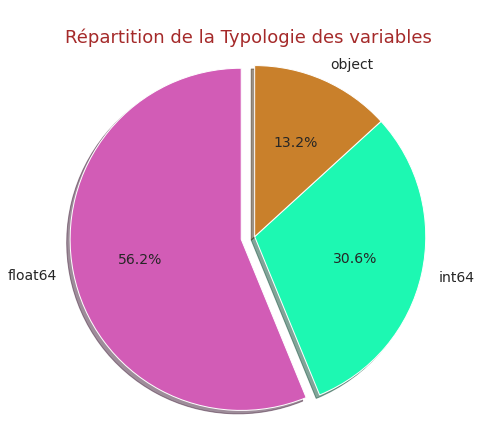

In [17]:
camemberg( labels=data.dtypes.value_counts().index , sizes= data.dtypes.value_counts().values, figure_size=(7,7), titre = "\nRépartition de la Typologie des variables" , rot = 90)

Les variables fournies sont majoritairement de type numérique ( 86 % )

## Proportion de valeurs manquantes dans les données

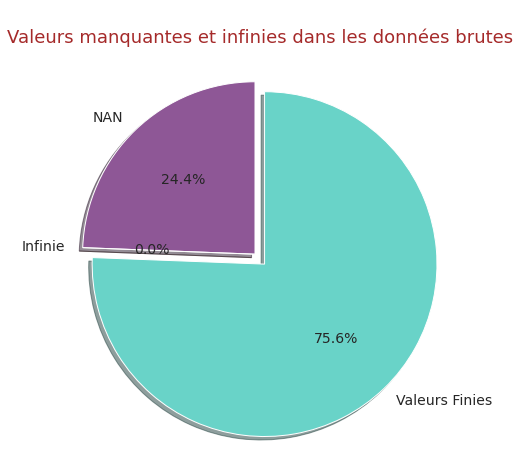

In [18]:
nan_proportion(data_0,figsize=(7,7) , rot = 90)

Près de 1/4 des données sont manquantes

## Distribution de valeurs manquantes sur les variables

In [19]:
tableau_valeur_manquante(data).head(10)

,Nb de valeurs infinies,Nb de Valeurs manquantes,Inf Proportions ( % ),Nan Proportions ( % )
COMMONAREA_MODE,0,214865,0.0,69.87
COMMONAREA_MEDI,0,214865,0.0,69.87
COMMONAREA_AVG,0,214865,0.0,69.87
NONLIVINGAPARTMENTS_MEDI,0,213514,0.0,69.43
NONLIVINGAPARTMENTS_AVG,0,213514,0.0,69.43
NONLIVINGAPARTMENTS_MODE,0,213514,0.0,69.43
FONDKAPREMONT_MODE,0,210295,0.0,68.39
LIVINGAPARTMENTS_AVG,0,210199,0.0,68.35
LIVINGAPARTMENTS_MODE,0,210199,0.0,68.35
LIVINGAPARTMENTS_MEDI,0,210199,0.0,68.35


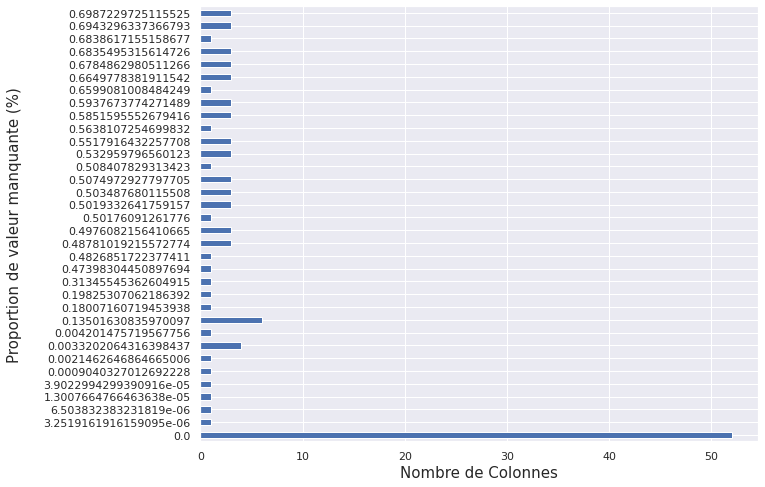

In [20]:
plt.figure(figsize=(10,8))
data.isna().mean().value_counts().sort_index().plot.barh()
plt.xlabel('Nombre de Colonnes' ,size = 15)
plt.ylabel('Proportion de valeur manquante (%)\n', size=15)
plt.show()

<Figure size 432x288 with 0 Axes>

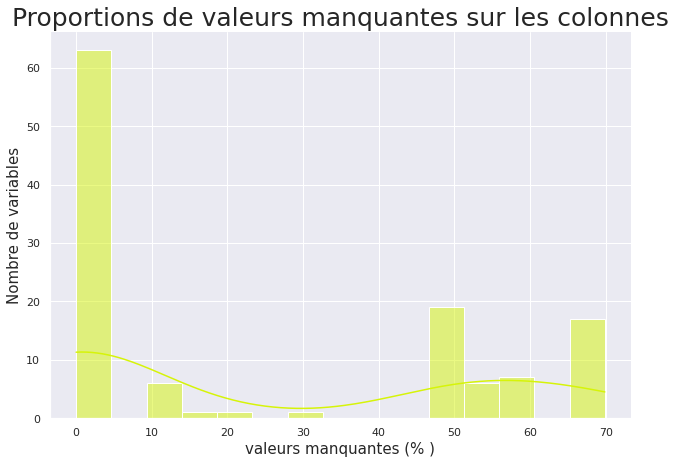

In [21]:
def f (n_bar ) :
    plot_nan_proportion(data, plt_type="col", n_bar = n_bar, figsize=(9,6))

n_bar = widgets.IntSlider(min = 3,max=150,value = 15 , step=1, description ="Nbr_bar")

interact(f , n_bar = n_bar) ;

 Près de la moitié des variables préscolumnsent un taux de remplissage de 100 %

## Supression de colones à plus de 40 % de valeurs manquantes

In [22]:
print(f"Nombre de variables à supprimer : {data.columns[data.isna().mean() > 0.4].size}")
print("Supression en cours . . .")
data = data.drop(data.columns[data.isna().mean() > 0.4] , axis = 1)
print("Supression terminée.")

Nombre de variables à supprimer : 49
Supression en cours . . .
Supression terminée.


In [23]:
data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


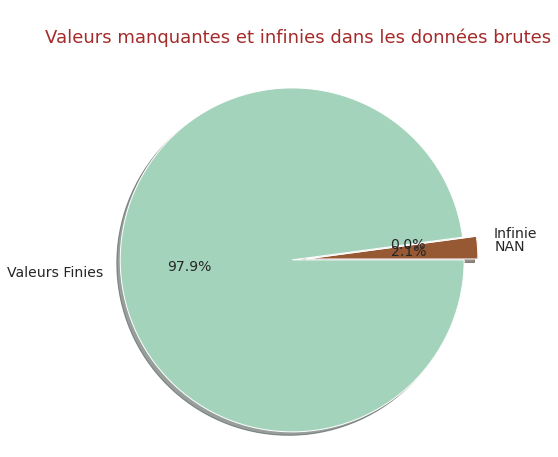

In [24]:
nan_proportion(data, rot = 0)

### Les variables avec au moins une valeur manquante

In [25]:
data.columns[data.isna().mean() > 0].size

20

## Distribution de valeurs manquantes sur les individus

<Figure size 432x288 with 0 Axes>

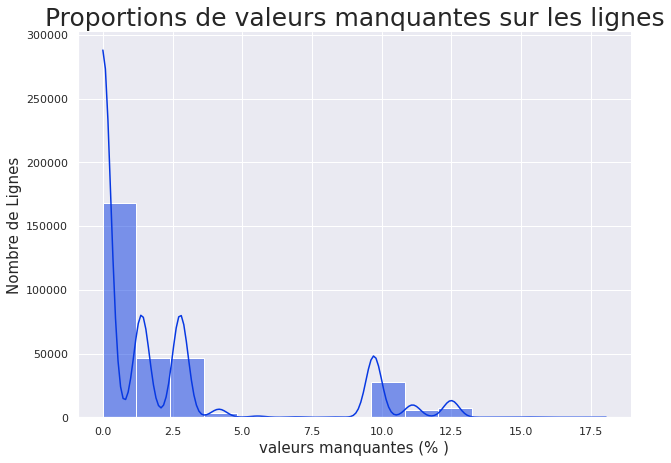

In [26]:
def f (n_bar ) :
    plot_nan_proportion(data, plt_type="lns", n_bar = n_bar,figsize=(9,6))

n_bar = widgets.IntSlider(min = 3,max=150,value = 15 , step=1, description ="Nbr_bar")
interact(f , n_bar = n_bar) ;

## Supression de lignes à plus de 5 % de valeurs manquantes

In [27]:
print(f"Nombre de lignes à supprimer : {data[data.isna().mean(axis = 1) > 0.05].shape[0]}")
print("Supression en cours . . .")
data = data.loc[data.isna().mean(axis=1) < 0.05, :]
print("Supression terminée.")

Nombre de lignes à supprimer : 42421
Supression en cours . . .
Supression terminée.


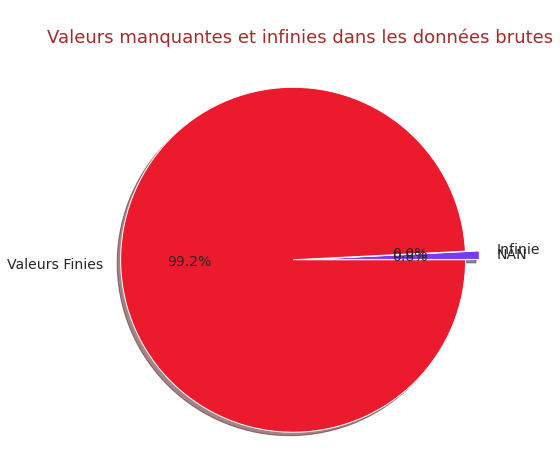

In [28]:
nan_proportion(data ,rot = 0)

## <strong> KNN-imputing sur les valeurs manquantes </strong>

In [29]:
save = False 

data , save = knn_imputing_on_data(data, save, nn = 7 ,verbose=True , AND = True )

KNN imputing terminé avec les 7 premiers voisins
Durée de l'execution 1.26 secondes.
RAS par ici : Rien à signaler dans le coin


##  Importations des données traitées suite à un KNN_imputing

Effectuer un KNN-imputing prends du temps, pour contourner le problème j'enrégistre le DataFrame après le KNN-imputing pour le recharger plutard si jamais je me rends compte d'une erreur en amont dans mon code et que je dois reprendre l'exécution du notebook.
 
Les variables `save` et `AND` de la fonction `knn_imputing_on_data` permettent respectivement de commander l'enrégistrment des données et l'application d'un knn-imputing sur les données.

In [30]:
if ( data.select_dtypes(include=[int,float]).isna().mean().mean() != 0 and "application_train_KNN.csv" in os.listdir() ) or not save :
    print("Importation des données en cours . . .")
    data = pd.read_csv( "application_train_KNN.csv" )
    if "Unnamed: 0" in data.columns : 
            data = data.drop(["Unnamed: 0"], axis=1)
    print("Fin de l'importation des données")

Importation des données en cours . . .
Fin de l'importation des données


In [31]:
data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265085,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,247500.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
265086,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
265087,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
265088,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
print(f"Taux de valeur infinie : {round(data.isin([np.inf, -np.inf]).mean().mean()*100,5) } %\nTaux de valeurs manquantes : {round(100*data.isna().mean().mean(),5)} %")

Taux de valeur infinie : 0.0 %
Taux de valeurs manquantes : 0.68919 %


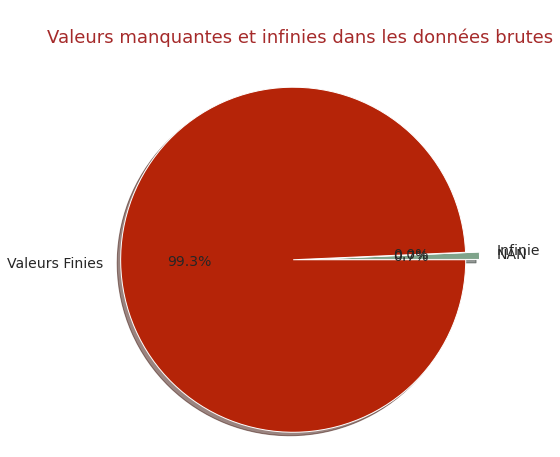

In [33]:
nan_proportion(data , rot=0)

## OUTLIERS 

Je vais visualiser es boxplot dee toutes les variables de type `float` en me limitant aux variables qui sont très peu étalées.
J'indique l'étalement ici à partier de l'entrée `limit` dans la fonction `all_boxplots`.


		Size : (265090,) - Mean : 0.03 - Med : 0.0 -  IQR : 0.0 -  Concentration : 0.0863


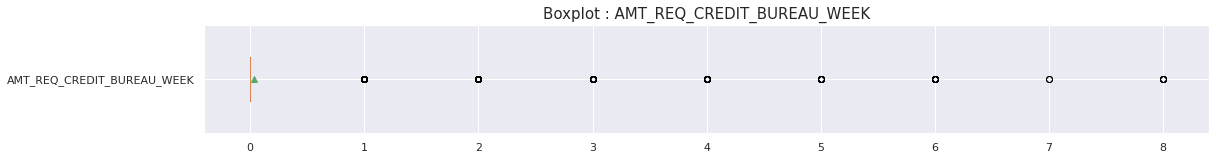


		Size : (265090,) - Mean : 0.01 - Med : 0.0 -  IQR : 0.0 -  Concentration : 0.0706


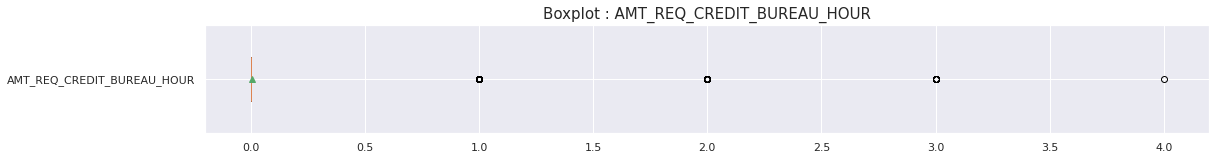


		Size : (265090,) - Mean : 0.1 - Med : 0.0 -  IQR : 0.0 -  Concentration : 0.0508


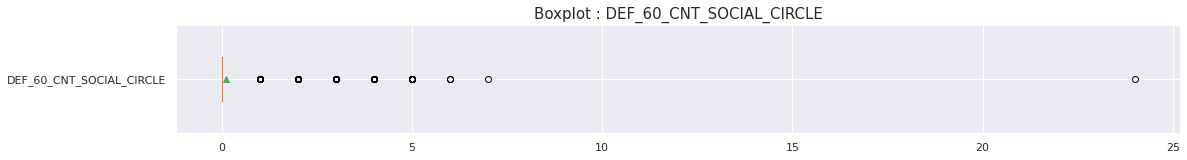


		Size : (265090,) - Mean : 0.14 - Med : 0.0 -  IQR : 0.0 -  Concentration : 0.0443


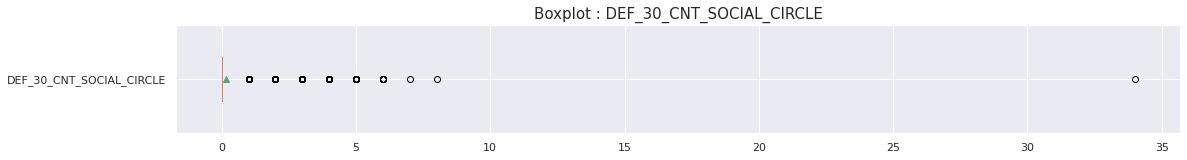


		Size : (265090,) - Mean : 0.01 - Med : 0.0 -  IQR : 0.0 -  Concentration : 0.0416


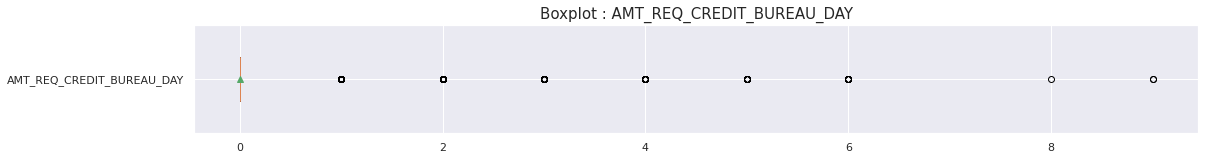


		Size : (265090,) - Mean : 1.41 - Med : 0.0 -  IQR : 2.0 -  Concentration : 0.0235


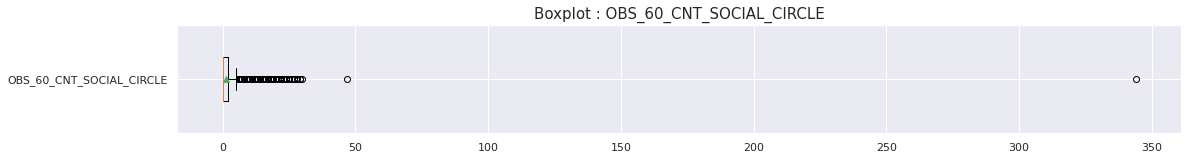


		Size : (265090,) - Mean : 1.43 - Med : 0.0 -  IQR : 2.0 -  Concentration : 0.0234


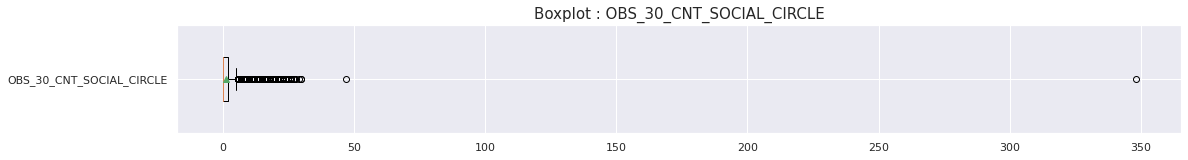


		Size : (265090,) - Mean : 0.27 - Med : 0.0 -  IQR : 0.0 -  Concentration : 0.0103


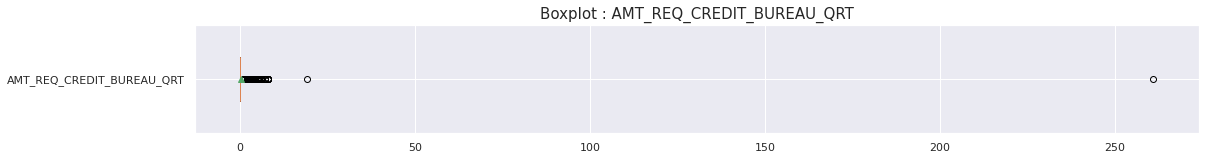


		Size : (265090,) - Mean : 171155.13 - Med : 157500.0 -  IQR : 90000.0 -  Concentration : 0.0072


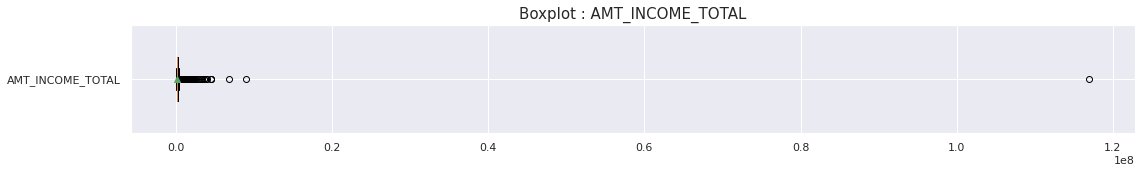

In [34]:
all_boxplots(data ,"float", limit = [0.1])

#### <strong> Traitement des OUTLIERS </strong>

In [35]:
col = ['AMT_INCOME_TOTAL','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_QRT'] 
lim = [ 6e6,10,10, 40, 40,10]
for i,limite in zip(col,lim) :
    if i in data.columns :
        mask = data[i] > limite
        data.loc[mask.values,i] = random_replace( data[i], mask )


		Size : (265090,) - Mean : 0.03 - Med : 0.0 -  IQR : 0.0 -  Concentration : 0.0863


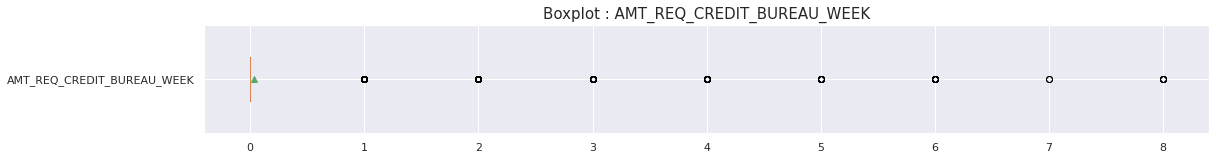


		Size : (265090,) - Mean : 170656.36 - Med : 157500.0 -  IQR : 90000.0 -  Concentration : 0.0748


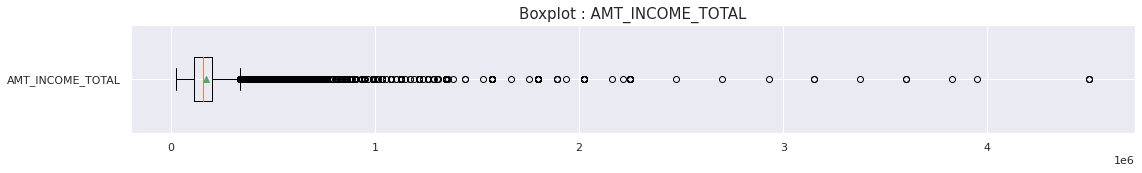


		Size : (265090,) - Mean : 0.01 - Med : 0.0 -  IQR : 0.0 -  Concentration : 0.0706


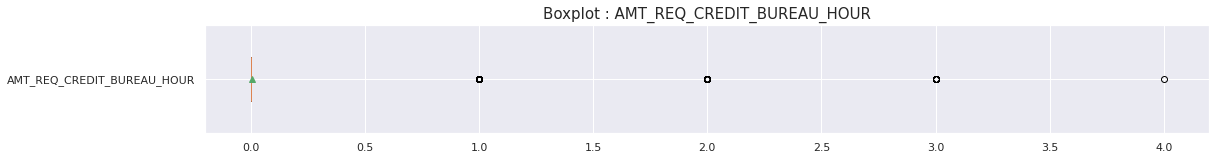


		Size : (265090,) - Mean : 0.01 - Med : 0.0 -  IQR : 0.0 -  Concentration : 0.0416


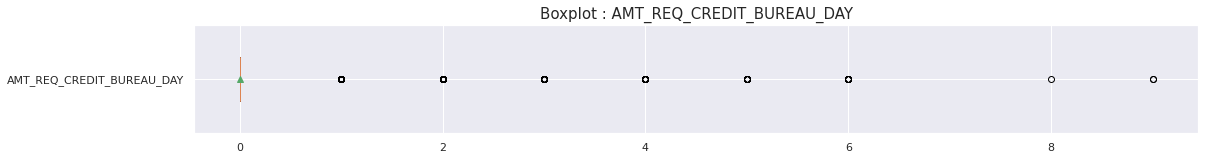

In [36]:
all_boxplots(data ,"float", limit = [0.1])

## <strong> NOUVELLES VARIABLES </strong>

In [37]:
data = nouvelles_variables(data )

## Valeurs négatives

In [38]:
for i in data.select_dtypes(include=[int,float]).columns :
    mask = data[i]<=0
    data.loc[mask,i] = abs(data.loc[mask,i])

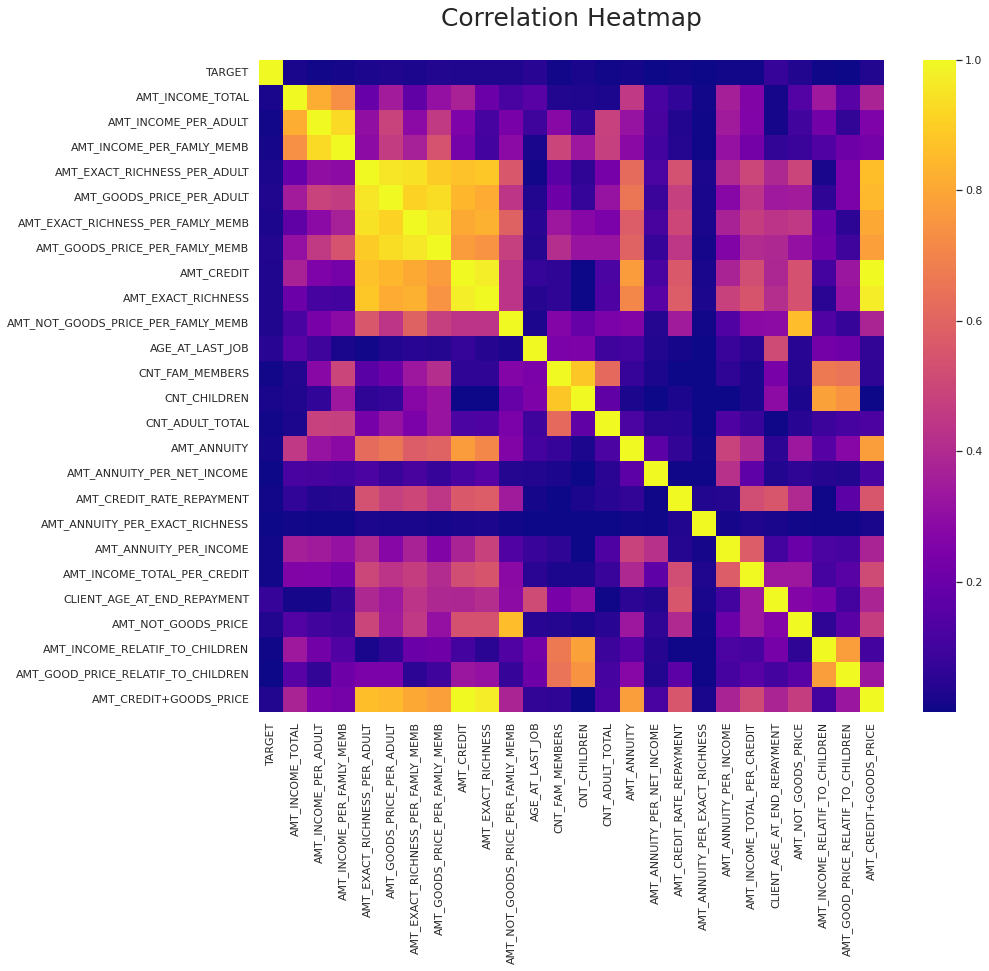

In [39]:
col = ["TARGET","AMT_INCOME_TOTAL","AMT_INCOME_PER_ADULT","AMT_INCOME_PER_FAMLY_MEMB","AMT_EXACT_RICHNESS_PER_ADULT","AMT_GOODS_PRICE_PER_ADULT","AMT_EXACT_RICHNESS_PER_FAMLY_MEMB","AMT_GOODS_PRICE_PER_FAMLY_MEMB",\
       "AMT_CREDIT","AMT_EXACT_RICHNESS","AMT_NOT_GOODS_PRICE_PER_FAMLY_MEMB","AGE_AT_LAST_JOB","CNT_FAM_MEMBERS","CNT_CHILDREN","CNT_ADULT_TOTAL","AMT_ANNUITY","AMT_ANNUITY_PER_NET_INCOME","AMT_CREDIT_RATE_REPAYMENT"\
       ,"AMT_ANNUITY_PER_EXACT_RICHNESS", "AMT_ANNUITY_PER_INCOME", "AMT_INCOME_TOTAL_PER_CREDIT","CLIENT_AGE_AT_END_REPAYMENT","AMT_NOT_GOODS_PRICE","AMT_INCOME_RELATIF_TO_CHILDREN","AMT_GOOD_PRICE_RELATIF_TO_CHILDREN",\
      "AMT_CREDIT+GOODS_PRICE"]

plt.figure(figsize=(14,12))
sns.heatmap( data[col].corr().apply(abs) , cmap = "plasma" , annot = False )
plt.title("Correlation Heatmap\n", size = 25);

## <strong> Distribution de la variable `TARGET` : </strong>
<strong> 0 </strong> si l'individu n'est pas <strong> en difficulté de remboursement </strong> de sa dette

<strong> 1 </strong> si l'individu est en difficulté de remboursement 

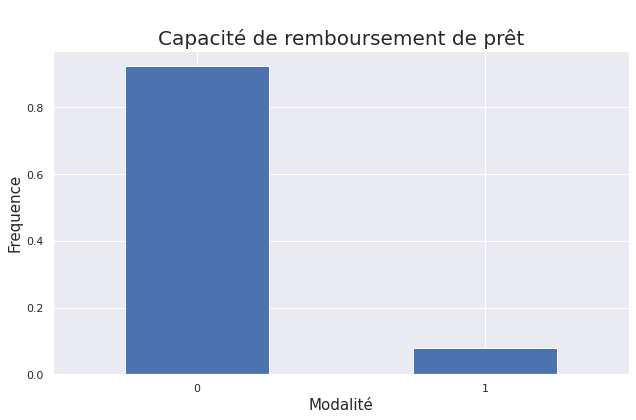

[0.9226564562978611, 0.07734354370213889]

In [40]:
plt.figure(figsize=(9,6))
data["TARGET"].value_counts(normalize=True).plot.bar()
plt.xlabel('Modalité', size=15)
plt.ylabel('Frequence', size=15)
plt.title("\nCapacité de remboursement de prêt", size=20)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
list( data["TARGET"].value_counts(normalize=True))

Dans nos données <strong> on retrouve majoritarement (92 %) de personne n'ayant aucune difficulté depaiements.</strong>

Dans la mesure où ces données représentent la totatlité des clients de <strong> la banque celà signifie que les clients de la banques n'ont pas trop de difficultés de remboursement.</strong>
Celà pourrait signifier qu'en moyenne dans la population très peu de personnes ont des difficultés de remobursement de leur prêt bancaire si on par de l'idée que les données fournies représentent un échantillon représentatif de la population globale sujette à des prêt. Ce qui est une bonne nouvelle pour les banques dans ce cas :)

Dans tous les cas <strong> le modèle d'apprentissage qui va apprendre de ces données sera en quelque sorte biaisé par ces données </strong> car aura beaucoup plus de faciliter à prédire qu'une personne ne sera pas en difficulté de paiement et beaucoup moins à reconnaitre des personnes en difficultés de paiement.

## La capacité de remboursement dépend t elle du sexe du client ?

Les clients de la banque sont constitués de 66.27 % de femmes et 33.73 d'hommes


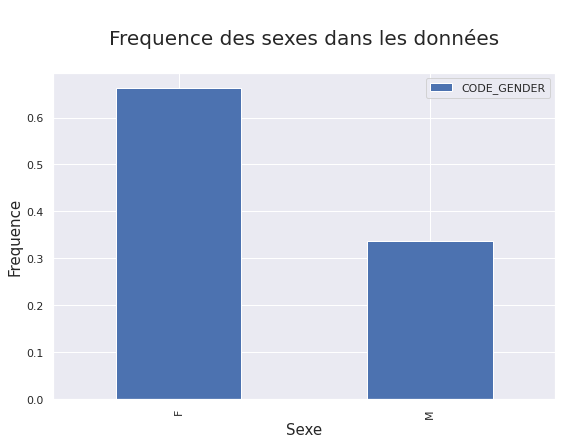

In [41]:
print( f"Les clients de la banque sont constitués de { round(( data['CODE_GENDER'] == 'F' ).mean()*100,2) } % de femmes et { round(( data['CODE_GENDER'] == 'M' ).mean()*100,2) } d'hommes")
plt.figure(figsize=(9,6))
data['CODE_GENDER'].value_counts(normalize=True).plot.bar()
plt.ylabel("Frequence",size=15)
plt.xlabel("Sexe" , size = 15)
plt.title("\nFrequence des sexes dans les données\n" , size=20)
plt.legend()
plt.show()

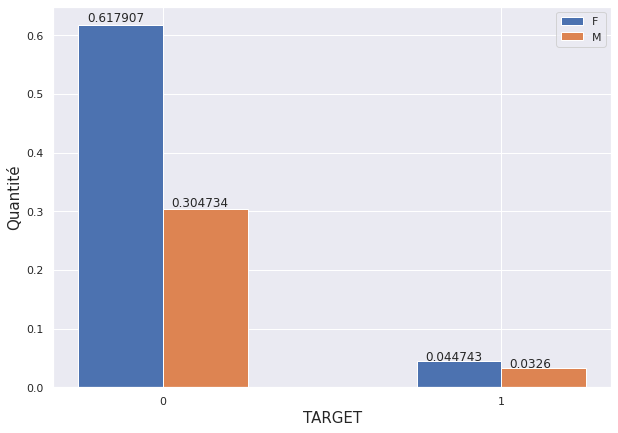

In [42]:
plot_multiple_bar( data ,observation = "CODE_GENDER" ,group= "TARGET", figsize=(10,7), show_count = True,normalize = True)

In [43]:
print(f"- Probabilité d'être une Femme : {round((data['CODE_GENDER']=='F').mean()*100,1)} %")
print(f"- Probabilité d'être un Homme : {round((data['CODE_GENDER']=='M').mean()*100,1)} %")
print(f"- Probabilité d'être une Femme sachant qu'on rembourse ses prêts : {round((((data['CODE_GENDER']=='F')&(data['TARGET']==0)).sum() /(data['TARGET']==0).sum() )*100,1)} %")
print(f"- Probabilité d'être un Homme sachant qu'on rembourse ses prêts : {round((((data['CODE_GENDER']=='M')&(data['TARGET']==0)).sum() /(data['TARGET']==0).sum() )*100,1)} %")
print(f"- Probabilité d'être une Femme sachant qu'on a des difficultés à rembourser ses prêts : {round((((data['CODE_GENDER']=='F')&(data['TARGET']==1)).sum() /(data['TARGET']==1).sum() )*100,1)} %")
print(f"- Probabilité d'être un Homme sachant qu'on a des difficultés à rembourser ses prêts : {round((((data['CODE_GENDER']=='M')&(data['TARGET']==1)).sum() /(data['TARGET']==1).sum() )*100,1)} %")

- Probabilité d'être une Femme : 66.3 %
- Probabilité d'être un Homme : 33.7 %
- Probabilité d'être une Femme sachant qu'on rembourse ses prêts : 67.0 %
- Probabilité d'être un Homme sachant qu'on rembourse ses prêts : 33.0 %
- Probabilité d'être une Femme sachant qu'on a des difficultés à rembourser ses prêts : 57.9 %
- Probabilité d'être un Homme sachant qu'on a des difficultés à rembourser ses prêts : 42.1 %


Compte te nu de la distribution initiale des deux sexes dans la clientèle de la banque ( <strong> 66 % de Femmes contre 33 % d'Hommes </strong>), on peut conclure que <strong> les femmes sont plus disposées à rembourser leur dettes</strong> et que <strong>les hommes quand à eux on plus de mal à honorer les échéances de leur credit</strong>.

## <strong>Que dire de la relation entre le montant du salaire et la capacité ou non de remboursement  ?</strong>


		Size : (265090,) - Mean : 170656.36 - Med : 157500.0 -  IQR : 90000.0 -  Concentration : 0.0748


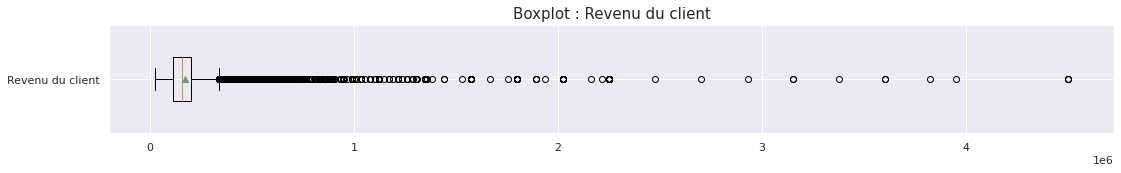

In [44]:
unique_boxplot(data['AMT_INCOME_TOTAL'], label=['Revenu du client'])

### Nuage des points

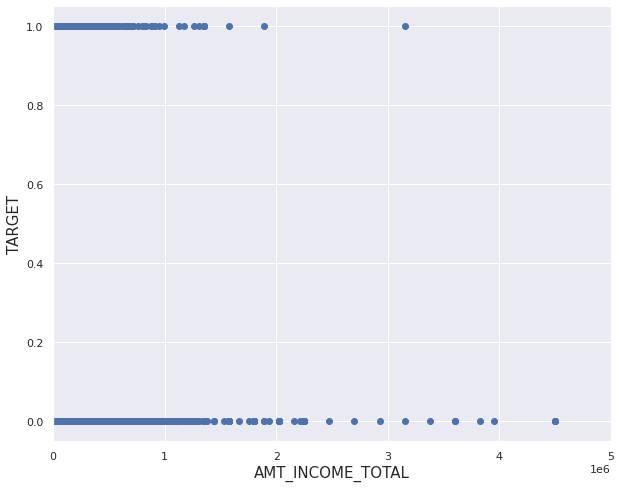

In [45]:
plt.figure(figsize=(10,8))
plt.title("",size=20)
plt.scatter( data["AMT_INCOME_TOTAL"],data["TARGET"],)
plt.ylabel("TARGET", size = 15)
plt.xlabel("AMT_INCOME_TOTAL",size=15)
plt.xlim(0,.5e7)
plt.show()

Les clients ayant du mal à rembourser leur dette sont en majorité parmi ceux qui ont un revenu inférieur à 1.000.000

La figure montre aussi qu'on ne peut établir un critère d'éllxlimilité à un prêt en se basant uniquement sur les revenus des clients car parmi les client à faible revenus on retrouve autant ceux qui ont des difficultés à rembourser leur prêts mais aussi ceux qui les remboursent à échéance.

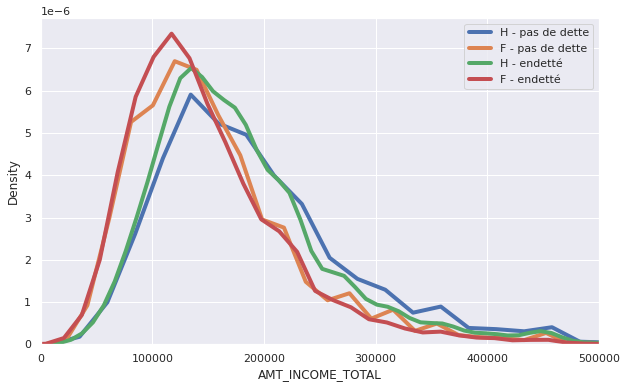

In [46]:
plt.figure(figsize=(10,6))
plt.title("",size=20)
sns.kdeplot(data.loc[(data["CODE_GENDER"]=="M") & (data["TARGET"]== 0) ,'AMT_INCOME_TOTAL'] , lw= 4, label ='H - pas de dette', cut=20)
sns.kdeplot(data.loc[(data["CODE_GENDER"]=="F") & (data["TARGET"]== 0) ,'AMT_INCOME_TOTAL'] , lw= 4, label ='F - pas de dette', cut=20)
sns.kdeplot(data.loc[(data["CODE_GENDER"]=="M") & (data["TARGET"]== 1) ,'AMT_INCOME_TOTAL'] , lw= 4, label ='H - endetté')
sns.kdeplot(data.loc[(data["CODE_GENDER"]=="F") & (data["TARGET"]== 1) ,'AMT_INCOME_TOTAL'] , lw= 4, label ='F - endetté')
plt.xlim(0,5e5)
plt.legend()
plt.show()

La position relative des courbes indique qu'<strong>aussi bien chez les homme que ches les femmes, les clients ont de moins en moins de difficulté à rembourser leur credit à mesure qu'ils gagnent suffisament.</strong> L'effet étant plus grand chez les hommes.

Cela peut se confirmer par le calcul de <strong>la correlation entre ces deux variables par sexe qui bien qu'étant très faible reste négative avec une amplitude deux fois plus important chez les Hommes que les femmes. </strong>

On remarque aussi que les femmes ont beaucoup de soucis à rembourser que les hommes à mesure qu'elles gagnent beaucoup. L'observation inverse est faite pour les individus qui gagnent peu.

<strong>- Correlation entre difficulté de remboursement et salaire chez les femmes </strong>

In [47]:
data.loc[data["CODE_GENDER"]=="F" , ["TARGET","AMT_INCOME_TOTAL"]].corr()

,TARGET,AMT_INCOME_TOTAL
TARGET,1.000000,-0.018994
AMT_INCOME_TOTAL,-0.018994,1.000000


<strong>- Correlation entre difficulté de remboursement et salaire chez les Hommes </strong>

In [48]:
data.loc[data["CODE_GENDER"]=="M" , ["TARGET","AMT_INCOME_TOTAL"]].corr()

,TARGET,AMT_INCOME_TOTAL
TARGET,1.000000,-0.040584
AMT_INCOME_TOTAL,-0.040584,1.000000


### Répartition des salaires par sexe

<Figure size 720x432 with 0 Axes>

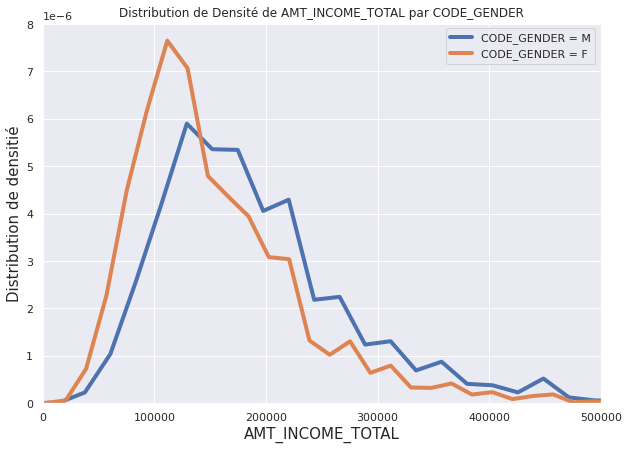

In [49]:
plt.figure(figsize=(10,6))
density_compare(data , observation = "AMT_INCOME_TOTAL" , group = "CODE_GENDER", x_bornes = (0,0.5e6) )
plt.show()

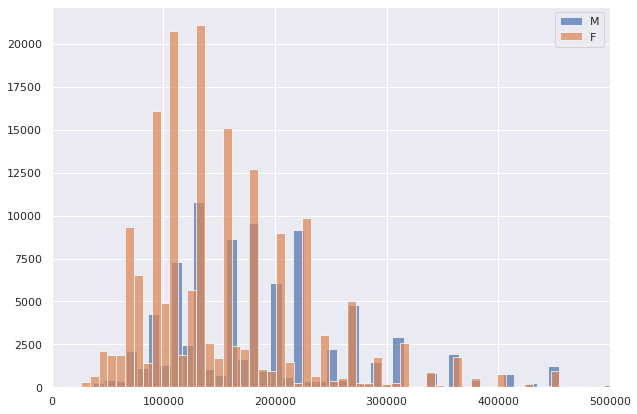

In [50]:
plt.figure(figsize=(10,7) )
data.loc[data["CODE_GENDER"]=="M", "AMT_INCOME_TOTAL"].hist(bins=450, label="M",alpha=0.7)
data.loc[data["CODE_GENDER"]=="F", "AMT_INCOME_TOTAL"].hist(bins=450, label="F",alpha=0.7)
plt.xlim(0,5e5)
plt.legend()
plt.show()

On rencontre beaucoup plus d'hommes

In [51]:
data[["AMT_INCOME_TOTAL","TARGET"]].corr()

,AMT_INCOME_TOTAL,TARGET
AMT_INCOME_TOTAL,1.000000,-0.018252
TARGET,-0.018252,1.000000


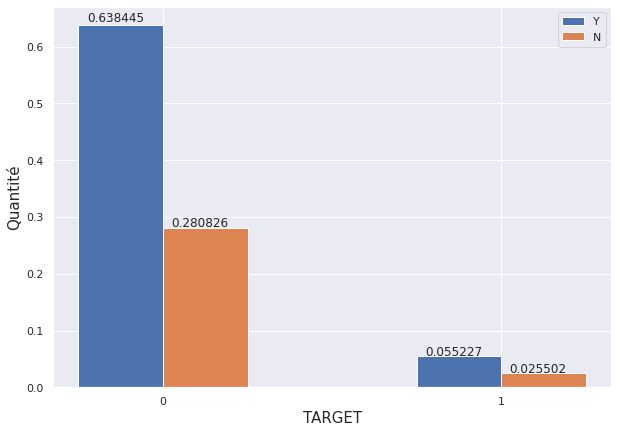

In [52]:
plot_multiple_bar(data_0 ,observation= "FLAG_OWN_REALTY" ,group= "TARGET", figsize=(10,7), show_count = True,normalize = True)

In [53]:
data[["FLAG_OWN_REALTY","FLAG_OWN_CAR"]].corr()

""


<Figure size 720x432 with 0 Axes>

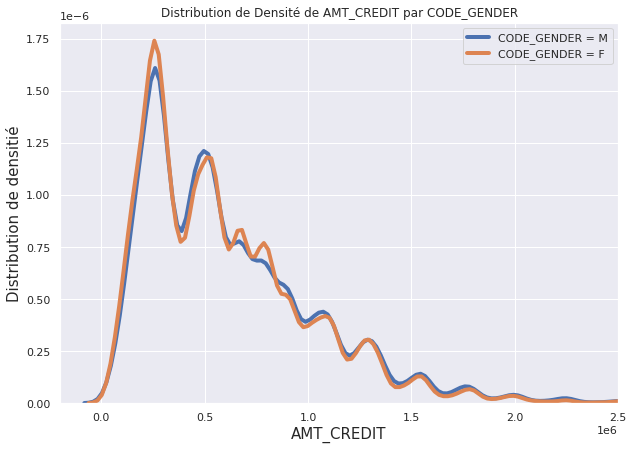

In [54]:
plt.figure(figsize=(10,6))
density_compare(data , observation = "AMT_CREDIT" , group = "CODE_GENDER",x_bornes=(-0.2e6 , 2.5e6))
plt.show()

<Figure size 720x432 with 0 Axes>

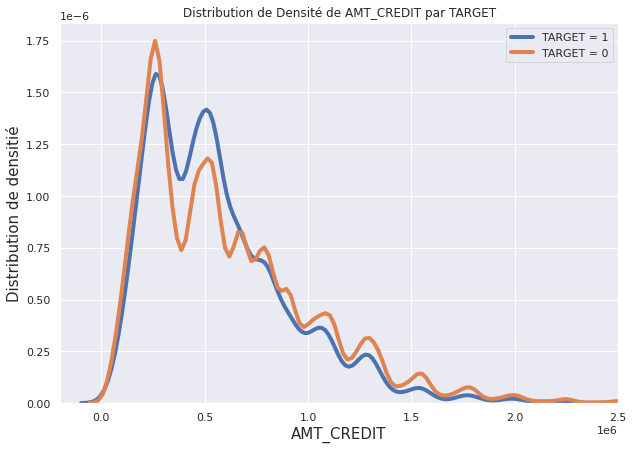

In [55]:
plt.figure(figsize=(10,6))
density_compare(data , observation = "AMT_CREDIT" , group = "TARGET",x_bornes=(-0.2e6 , 2.5e6))
plt.show()

<Figure size 720x432 with 0 Axes>

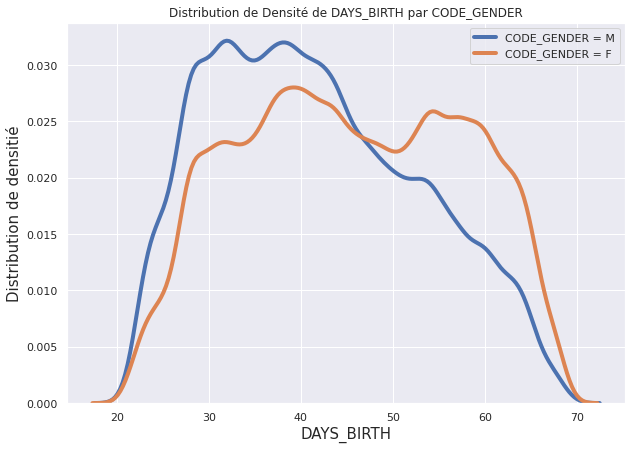

In [56]:
plt.figure(figsize=(10,6))
density_compare(data , observation = "DAYS_BIRTH" , group = "CODE_GENDER",)
plt.show()

<Figure size 720x432 with 0 Axes>

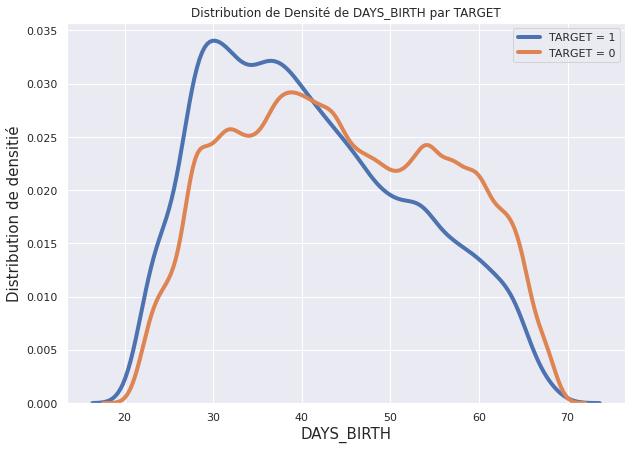

In [57]:
plt.figure(figsize=(10,6))
density_compare(data , observation = "DAYS_BIRTH" , group = "TARGET")
plt.show()

<Figure size 720x432 with 0 Axes>

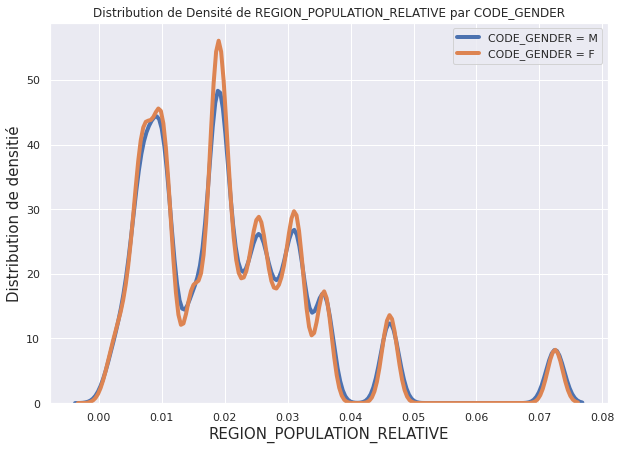

In [58]:
plt.figure(figsize=(10,6))
density_compare(data , observation = "REGION_POPULATION_RELATIVE" , group = "CODE_GENDER",)
plt.show()

<Figure size 720x432 with 0 Axes>

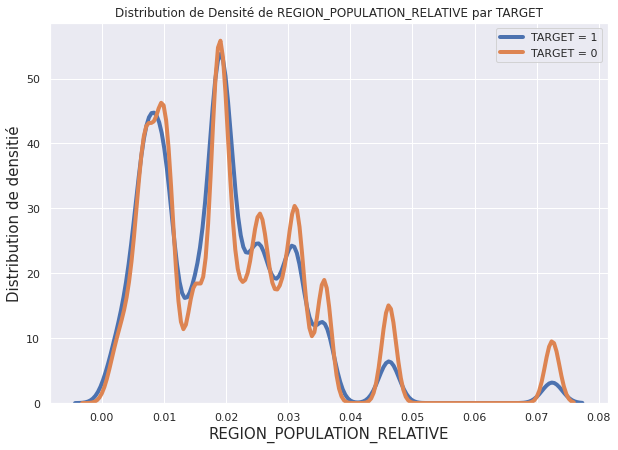

In [59]:
plt.figure(figsize=(10,6))
density_compare(data , observation = "REGION_POPULATION_RELATIVE" , group = "TARGET",)
plt.show()

## <strong>Label Encoding :  Numérisation de variable binaire catégorielles </strong>

In [60]:
binary_object_variable = data.select_dtypes(object).columns[data.select_dtypes(object).nunique() == 2]
binary_object_variable

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'], dtype='object')

In [61]:
data[binary_object_variable][:6]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,Cash loans,M,N,Y
1,Cash loans,F,N,N
2,Revolving loans,M,Y,Y
3,Cash loans,M,N,Y
4,Cash loans,M,N,Y
5,Cash loans,F,Y,Y


In [62]:
for i in binary_object_variable :
    data[i].replace( np.sort( data[i].value_counts().index ), [0,1] , inplace=True )

In [63]:
data[binary_object_variable][:6]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,0,1.0,0,1
1,0,0.0,0,0
2,1,1.0,1,1
3,0,1.0,0,1
4,0,1.0,0,1
5,0,0.0,1,1


## <strong> One-Hot Encoding : Transformation de variables catégorielles en variables numériques  </strong>

In [64]:
data[["NAME_FAMILY_STATUS"]][:6]

,NAME_FAMILY_STATUS
0,Single / not married
1,Married
2,Single / not married
3,Single / not married
4,Married
5,Married


In [65]:
print("One-hot Encoding en cours . .. ")
data = pd.get_dummies(data , dummy_na=False, dtype = np.int64 , prefix_sep=" :: ")
print("One-hot Encoding terminé ")

One-hot Encoding en cours . .. 
One-hot Encoding terminé 


In [66]:
data[[i for i in data.columns if "NAME_FAMILY_STATUS" in i]][:6]

,NAME_FAMILY_STATUS :: Civil marriage,NAME_FAMILY_STATUS :: Married,NAME_FAMILY_STATUS :: Separated,NAME_FAMILY_STATUS :: Single / not married,NAME_FAMILY_STATUS :: Unknown,NAME_FAMILY_STATUS :: Widow
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0


In [67]:
print(f"Taux de valeur infinie : {round(data.isin([np.inf, -np.inf]).mean().mean()*100,5) } %\nTaux de valeurs manquantes : {round(100*data.isna().mean().mean(),5)} %")

Taux de valeur infinie : 0.00312 %
Taux de valeurs manquantes : 1e-05 %


In [68]:
print("Suppression des valeurs infinies . . .")
data[data.isin([np.inf, -np.inf]).values] = np.nan  # Transformation des valeurs infinies en valeurs manquantes
data = data.dropna(axis=0)
print("Suppression terminée.")

Suppression des valeurs infinies . . .
Suppression terminée.


In [69]:
print(f"Taux de valeur infinie : {round(data.isin([np.inf, -np.inf]).mean().mean()*100,5) } %\nTaux de valeurs manquantes : {round(100*data.isna().mean().mean(),5)} %")

Taux de valeur infinie : 0.0 %
Taux de valeurs manquantes : 0.0 %


In [70]:
data.shape

(263397, 204)

In [71]:
data.dtypes.value_counts()

int64      156
float64     48
dtype: int64

## <strong>SMOTE</strong> 

<strong>Synthetic Minority Oversampling Technique</strong>

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Importation du module necessaire au smoting

In [72]:
from imblearn.over_sampling import SMOTE

Porportion initiales des clusters dans les données

Text(0.5, 0, 'TARGET')

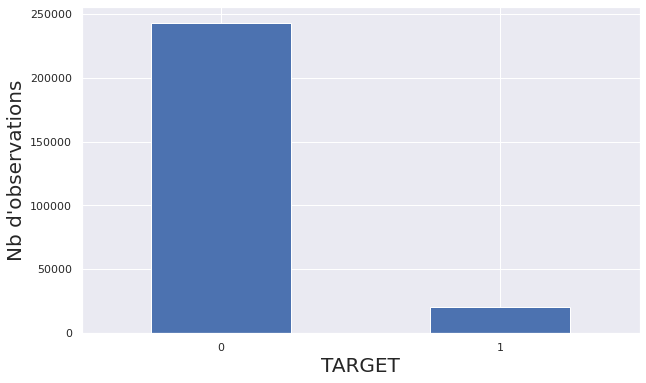

In [73]:
plt.figure(figsize=(10,6))
data["TARGET"].value_counts(normalize=False).plot.bar()
plt.xticks(rotation=0)
plt.ylabel("Nb d'observations", size=20)
plt.xlabel("TARGET", size=20)
#plt.ylim(0,1)

Liste de colonnes associées aux features

In [74]:
features_col = [i for i in data.columns if i not in ["TARGET"]]

## <strong>Smoting </strong>

In [75]:
# Oversampling des données    :   https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html
Smote = SMOTE(sampling_strategy='minority', k_neighbors = 3 , n_jobs=os.cpu_count()-1 )    #   , random_state = 5
data[data.isin([np.inf, -np.inf]).values] = np.nan  # Transformation des valeurs infinies en valeurs manquantes
data = data.dropna(axis=0)
a , b = Smote.fit_resample(data[features_col] , data["TARGET"])
data = pd.concat([b,a], axis=1)
# Nouveaux index du dataframe
#data = data.reindex( a.index + data_0["SK_ID_CURR"][0] )

In [76]:
print(f"Taux de valeur infinie : {round(data.isin([np.inf, -np.inf]).mean().mean()*100,5) } %\nTaux de valeurs manquantes : {round(100*data.isna().mean().mean(),5)} %")

Taux de valeur infinie : 0.0 %
Taux de valeurs manquantes : 0.0 %


In [77]:
data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE :: Trade: type 3,ORGANIZATION_TYPE :: Trade: type 4,ORGANIZATION_TYPE :: Trade: type 5,ORGANIZATION_TYPE :: Trade: type 6,ORGANIZATION_TYPE :: Trade: type 7,ORGANIZATION_TYPE :: Transport: type 1,ORGANIZATION_TYPE :: Transport: type 2,ORGANIZATION_TYPE :: Transport: type 3,ORGANIZATION_TYPE :: Transport: type 4,ORGANIZATION_TYPE :: University
0,1,0,1.000000,0,1,0,202500.000000,4.065975e+05,24700.500000,3.510000e+05,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0.000000,0,0,0,270000.000000,1.293502e+06,35698.500000,1.129500e+06,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1.000000,1,1,0,67500.000000,1.350000e+05,6750.000000,1.350000e+05,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.000000,0,1,0,121500.000000,5.130000e+05,21865.500000,5.130000e+05,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1.000000,0,1,0,99000.000000,4.904955e+05,27517.500000,4.545000e+05,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485967,1,0,1.000000,0,0,2,197952.702922,8.869483e+05,36830.094627,6.659054e+05,...,0,0,0,0,0,0,0,0,0,0
485968,1,0,0.000000,0,0,2,225000.000000,6.491386e+05,25386.037978,4.418538e+05,...,0,0,0,0,0,0,0,0,0,0
485969,1,0,0.688844,0,1,2,112500.000000,5.185620e+05,25553.169222,4.635000e+05,...,0,0,0,0,0,0,0,0,0,0
485970,1,0,0.637029,0,0,1,135000.000000,3.119055e+05,16315.427417,2.368666e+05,...,0,0,0,0,0,0,0,0,0,0


## Proportions des différentes classes dans les données après l'opération de smoting

Text(0.5, 0, 'TARGET')

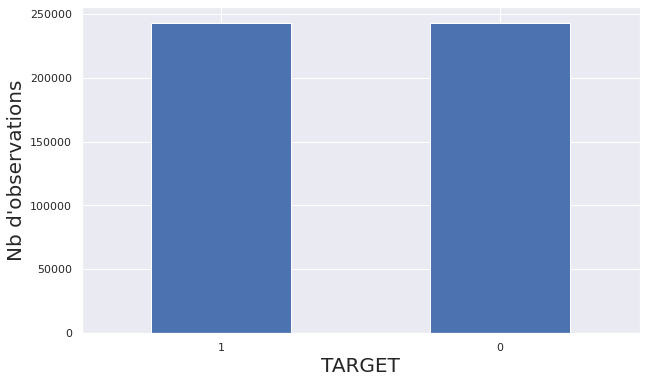

In [78]:
plt.figure(figsize=(10,6))
data["TARGET"].value_counts(normalize=False).plot.bar()
plt.xticks(rotation=0)
plt.ylabel("Nb d'observations", size=20)
plt.xlabel("TARGET", size=20)
#plt.ylim(0,1)

## Arrondi à l'unité de toutes les variables entières

for i in data_0.select_dtypes(int).columns :
    if i in data.columns :
        data[i] =data[i].apply(round , args=(0) )

## <strong>Conversion de variable de type entière en type floatant<strong>

In [79]:
print(data.dtypes.value_counts() )

int64      156
float64     48
dtype: int64


In [80]:
col_int = data.select_dtypes(include=[int]).columns
data[col_int] = data[col_int].astype(float)

In [81]:
print(data.dtypes.value_counts() )

float64    204
dtype: int64


## <strong> Data save </strong>

In [82]:
data_1 = data

##  <strong> Séparation TRAIN et TEST set </strong>

In [83]:
data , data_test = get_train_test_dataframe( data_1  , test_prop = 0.3, nan_in_test = False )
data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE :: Trade: type 3,ORGANIZATION_TYPE :: Trade: type 4,ORGANIZATION_TYPE :: Trade: type 5,ORGANIZATION_TYPE :: Trade: type 6,ORGANIZATION_TYPE :: Trade: type 7,ORGANIZATION_TYPE :: Transport: type 1,ORGANIZATION_TYPE :: Transport: type 2,ORGANIZATION_TYPE :: Transport: type 3,ORGANIZATION_TYPE :: Transport: type 4,ORGANIZATION_TYPE :: University
1,0.0,0.0,0.000000,0.0,0.0,0.0,270000.000000,1.293502e+06,35698.500000,1.129500e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.000000,1.0,1.0,0.0,67500.000000,1.350000e+05,6750.000000,1.350000e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.000000,0.0,1.0,0.0,121500.000000,5.130000e+05,21865.500000,5.130000e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.000000,0.0,1.0,0.0,99000.000000,4.904955e+05,27517.500000,4.545000e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.000000,1.0,1.0,1.0,171000.000000,1.560726e+06,41301.000000,1.395000e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485965,1.0,0.0,0.000000,0.0,0.0,1.0,202500.000000,7.099806e+05,60669.168884,6.776499e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
485966,1.0,0.0,0.097687,0.0,1.0,1.0,135000.000000,2.042242e+05,15926.858544,1.800000e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
485967,1.0,0.0,1.000000,0.0,0.0,2.0,197952.702922,8.869483e+05,36830.094627,6.659054e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
485968,1.0,0.0,0.000000,0.0,0.0,2.0,225000.000000,6.491386e+05,25386.037978,4.418538e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## <strong>  X_train, X_test , Y_train , Y_test  </strong>

In [84]:
X_train, Y_train = data.drop(["TARGET"], axis=1) , data[["TARGET"]]

In [85]:
X_test , Y_test = data_test.drop(["TARGET"], axis=1) , data_test[["TARGET"]]

In [86]:
X_train.shape

(340181, 203)

In [87]:
X_test.shape

(145791, 203)

<AxesSubplot:>

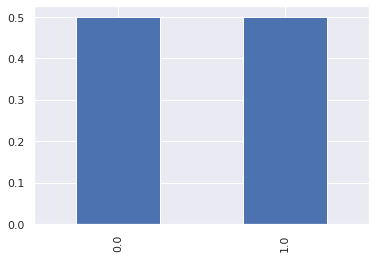

In [88]:
Y_train["TARGET"].value_counts(normalize=True).plot.bar()

<AxesSubplot:>

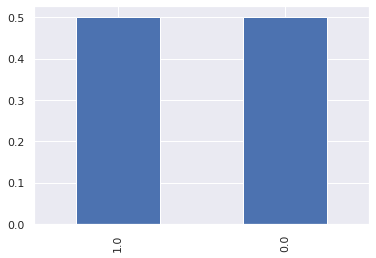

In [89]:
Y_test["TARGET"].value_counts(normalize=True).plot.bar()

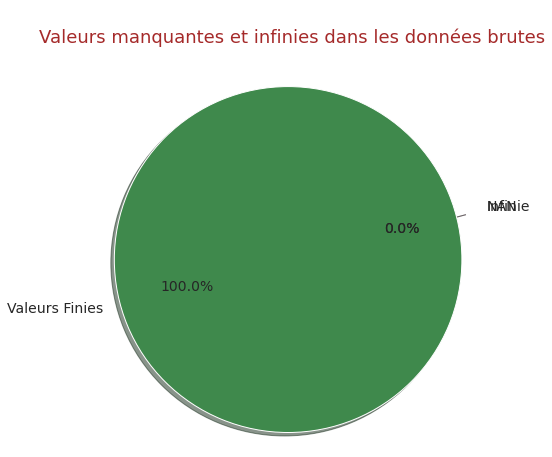

In [90]:
nan_proportion(data)

## SAVE

Sauvegarde des données de test et d'entrainement en fichier csv pour utilisation dans d'autres notebook de modélisation des données et d'interprétation du meilleur modèle choisi

In [ ]:
print("Debut de sauvegarde")

X_train.to_csv("X_train.csv")
Y_train.to_csv("Y_train.csv")
X_test.to_csv("X_test.csv")
Y_test.to_csv("Y_test.csv")

print("Fin de la sauvegarde")

Debut de sauvegarde
